###### Step 1: Importing Libraries(Using Darts for timeseries forecasting)

In [1]:
from darts import TimeSeries
import pandas as pd

###### Step 2: Importing covid cases data from covid19h (Source: John Hopkins) from 1st November and relevant data for analysis

In [2]:
# Importing data obtained from Data Acquisition Team (This data contains 40% of seating capacity)
data = pd.read_csv('data_sa_new.csv')
data["day"] = pd.to_datetime(data.day, format='%Y-%m-%d')

In [3]:
countries = list(data["dest cou"].unique())

In [4]:
from datetime import datetime
from covid19dh import covid19
x, src = covid19(countries, start = datetime(2021,11,1), end = "2022-03-04")
x["date"] = pd.to_datetime(x['date']).dt.date

C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: F

C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: F

C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: F

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)


###### Step3: Data Preparation for Analysis

In [5]:
# Divinding data based on the country
import numpy as np
countries=list(data["Countries"].unique())
countries_data=[data.loc[data["Countries"] == i] for i in countries]
start, end = list(countries_data[0].day)[0],list(countries_data[0].day)[-1]
dt_ran = pd.date_range(start=start,end=end,freq="D")
t_index=pd.DatetimeIndex(dt_ran)
countries_data = [i.set_index("day").reindex(t_index).fillna(0).reset_index() for i in countries_data]
for i in countries_data:
    pop_d = [i for i in list(i['Population Density'].unique()) if i!=0]
    dest_cnt = [i for i in list(i['dest cou'].unique()) if i!=0]
    i['Population Density'] = i['Population Density'].replace(0,pop_d[0]).values
    i['dest cou'] = i['dest cou'].replace(0,dest_cnt[0]).values
    i['Seats'] = i['Seats'].cumsum()

In [6]:
# Mapping covid cases to each country
import datetime
for cnt in countries_data:
    cases=[]
    population = []
    for index,i in list(cnt.iterrows()):
        start = i["index"]+datetime.timedelta(days=2)
        end = i["index"]+datetime.timedelta(days=1)
        y = x[x["iso_alpha_2"]==i["dest cou"]]
        date_range = y[(y["date"]>=end) & (y["date"]<=start)]
        confirmed = list(date_range["confirmed"])
        if(len(confirmed)>1):
            cases.append(confirmed[1]-confirmed[0])
        else:
            cases.append(cases[-1])
        population.append(list(y["population"])[0])
    cnt["cases"] = cases
    cnt["Population"] = population

C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-compara

C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-compara

C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [7]:
data = pd.concat(countries_data)

###### Step4: Conversion to time series

In [8]:
series_main = [TimeSeries.from_dataframe(i, 'index', ['cases',"Seats"],fill_missing_dates=False, freq='D') for i in countries_data]

###### Step5:  Standardization of Data

In [9]:
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_cases = [Scaler(scaler) for i in series_main]
scaler_seats = [Scaler(scaler) for i in series_main]
series_cases =  [y.fit_transform(i["cases"]) for y,i in zip(scaler_cases,series_main)]
series_seats =  [y.fit_transform(i["Seats"]) for y,i in zip(scaler_seats,series_main)]

In [10]:
series = [i.concatenate(j,axis="component") for i, j in zip(series_cases,series_seats)]

###### Step6: Applying Algorithms on data

###### LSTM

In [11]:
from darts.models import BlockRNNModel
# Model takes minimum 10 days and forecasts maximum 20 days of future data
model = BlockRNNModel(input_chunk_length =10,output_chunk_length=20,model="LSTM")
model.fit([i[0:53] for i in series])

2022-08-26 21:11:18 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-08-26 21:11:18 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-08-26 21:11:18 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-08-26 21:11:18 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-08-26 21:11:18 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.9 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
3.9 K     Trainable params
0         Non-trainable params
3.9 K     Total params
0.032     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

2022-08-26 21:13:27 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=100` reached.


###### Step7: Inverse Standardization

In [12]:
pred = model.predict(n=10,series=series[4][53:63])

inverse_series_cases = [scaler_cases[index].inverse_transform(i["cases"][:94]) for index,i in enumerate(series)]
inverse_series_seats = [scaler_seats[index].inverse_transform(i["Seats"][:94]) for index,i in enumerate(series)]
inverse_pred_cases = scaler_cases[4].inverse_transform(pred["cases"])
inverse_pred_seats = scaler_seats[4].inverse_transform(pred["Seats"])


Predicting: 34it [00:00, ?it/s]

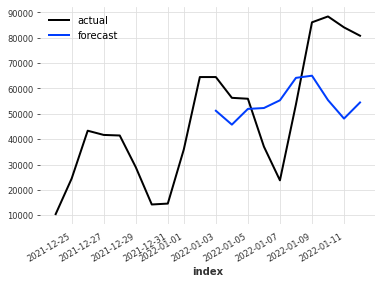

In [13]:
# Plotting actual against forecast for a random country
import matplotlib.pyplot as plt
inverse_series_cases[4][53:73]["cases"].plot(label="actual")
inverse_pred_cases.plot(label="forecast")

###### Step8: Calculating error percentage ((actual-forecast)*100/actual)

In [15]:
from darts.metrics import mae
forecast_data = []
mape_nos = []
inverse_series_cases = [scaler_cases[index].inverse_transform(i["cases"][:94]) for index,i in enumerate(series)]
for index,i in enumerate(countries):
    pred = model.predict(n=11,series=series[index][53:73])
    inverse_pred_cases = scaler_cases[index].inverse_transform(pred["cases"])
    print(i)
    print("MAE for cases = {:.2f}".format(mae(inverse_series_cases[index],inverse_pred_cases)))
    mae_no = mae(inverse_series_cases[index],inverse_pred_cases)
    mape_no = mae_no/(int(inverse_series_cases[index].pd_dataframe().max())+1)*100
    mape_nos.append(mape_no)
    print(inverse_series_cases[index].pd_dataframe().max())
    forecast_df = inverse_pred_cases.pd_dataframe().reset_index()
    forecast_df["Country"] = i 
    forecast_data.append(forecast_df)

Predicting: 34it [00:00, ?it/s]

United Arab Emirates (the)
MAE for cases = 1235.45
component
cases    3116.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Belgium
MAE for cases = 21726.92
component
cases    76034.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Bahrain
MAE for cases = 624.88
component
cases    8173.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Switzerland
MAE for cases = 11769.81
component
cases    48332.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Germany
MAE for cases = 35593.62
component
cases    239487.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

France
MAE for cases = 158055.09
component
cases    501635.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

United Kingdom of Great Britain and Northern Ireland (the)
MAE for cases = 12916.45
component
cases    275647.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Hong Kong
MAE for cases = 3185.96
component
cases    164.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

India
MAE for cases = 122734.76
component
cases    347254.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Lebanon
MAE for cases = 1596.13
component
cases    10760.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Malta
MAE for cases = 188.31
component
cases    1403.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Netherlands (the)
MAE for cases = 15431.98
component
cases    110450.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Philippines (the)
MAE for cases = 10067.11
component
cases    38867.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Qatar
MAE for cases = 1046.99
component
cases    4206.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Saudi Arabia
MAE for cases = 1995.07
component
cases    5928.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Ukraine
MAE for cases = 4650.96
component
cases    45022.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Canada
MAE for cases = 5554.43
component
cases    49148.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Italy
MAE for cases = 61015.47
component
cases    228123.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Singapore
MAE for cases = 4320.63
component
cases    10264.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Egypt
MAE for cases = 333.24
component
cases    2291.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Greece
MAE for cases = 3441.92
component
cases    50182.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Korea (the Republic of)
MAE for cases = 8242.57
component
cases    36362.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Turkey
MAE for cases = 8568.04
component
cases    111157.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

United States of America (the)
MAE for cases = 217598.69
component
cases    1433977.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Morocco
MAE for cases = 2291.29
component
cases    9355.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Croatia
MAE for cases = 3093.20
component
cases    11812.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

South Africa
MAE for cases = 2281.20
component
cases    37875.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Bangladesh
MAE for cases = 5046.31
component
cases    16033.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Poland
MAE for cases = 12467.79
component
cases    57659.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Australia
MAE for cases = 42592.22
component
cases    277619.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Spain
MAE for cases = 94773.17
component
cases    372766.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Cyprus
MAE for cases = 842.10
component
cases    5457.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Brazil
MAE for cases = 49935.18
component
cases    285396.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Czech Republic (the)
MAE for cases = 10552.38
component
cases    57247.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Malaysia
MAE for cases = 466.46
component
cases    7234.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Romania
MAE for cases = 5239.76
component
cases    40018.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Pakistan
MAE for cases = 2835.18
component
cases    8183.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Argentina
MAE for cases = 25040.84
component
cases    139853.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Ireland
MAE for cases = 4946.26
component
cases    26122.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Kazakhstan
MAE for cases = 5118.30
component
cases    16441.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Denmark
MAE for cases = 15651.19
component
cases    55001.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Algeria
MAE for cases = 873.85
component
cases    2521.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Russian Federation (the)
MAE for cases = 22280.36
component
cases    166957.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Sweden
MAE for cases = 15897.52
component
cases    53881.0
dtype: float64


Predicting: 34it [00:00, ?it/s]

Austria
MAE for cases = 7313.26
component
cases    44239.0
dtype: float64


###### Step9: Plotting the errors of country as bar plots

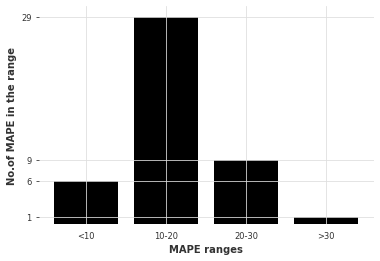

In [16]:
first=len([i for i in mape_nos if i<10])
second=len([i for i in mape_nos if i>10 and i<30])
third = len([i for i in mape_nos if i>30 and i<50])
fourth = len([i for i in mape_nos if i>50])

weights = [1,2,3,4]
bars_list = [first,second,third,fourth]

import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
ax1 = plt.subplot(1,1,1)
ax1.set_xticks(x)
ax1.set_yticks(bars_list)
plt.bar(x,bars_list)
ax1.set_xticklabels(["<10","10-20","20-30",">30"]) 
ax1.set_yticklabels(bars_list)
plt.ylabel("No.of MAPE in the range")
plt.xlabel("MAPE ranges")
plt.show()

In [17]:
pd.concat(forecast_data).to_csv("cases_forecast.csv")

###### Step10: Finding Incidence Rate (no. of. cases in the country/(population of the country * time frame of consideration))

In [18]:
class_data = pd.concat(forecast_data)

In [19]:
pop_density = []
for row in class_data.iterrows():
    pop_density.append(list(data[data["Countries"]==row[1]["Country"]]["Population"])[0])

class_data["Population"] = pop_density


In [20]:
class_data["cases"]=class_data["cases"].abs()

In [21]:
class_data["Incidence"] = class_data["cases"]*1000000/class_data["Population"]

###### Step11: One hot encoding for Country names

In [22]:
one_hot = pd.get_dummies(class_data["Country"])
data_sa = class_data.drop("Country", axis=1)
data_sa =  pd.concat([data_sa, one_hot], axis = 1)

###### Step12: Normalization of data

In [23]:
from sklearn import preprocessing

x = np.array(data_sa["Incidence"]).reshape(-1,1) #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled = [i[0] for i in x_scaled]
data_sa["Incidence"] = x_scaled

In [24]:
# deleting unused columns
del data_sa["index"]
del data_sa["Population"]
del data_sa["cases"]

###### Step13: Clustering using K means clustering

In [25]:
from dtaidistance import dtw,clustering
from dtaidistance.clustering import kmeans
model = kmeans.KMeans(k=3)
series_clu =  data_sa.to_numpy()
cluster_idx, performed_it = model.fit(series_clu)

2022-08-26 21:15:21 be.kuleuven.dtai.distance WARNING: Warning: loading library to link with numpy returned an error
2022-08-26 21:15:21 be.kuleuven.dtai.distance WARNING: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject
 40%|████████████████████████████████████████████████▍                                                                        | 4/10 [01:08<01:42, 17.05s/it]


In [26]:
clusters = [0]*len(class_data)

In [27]:
for i in cluster_idx.keys():
    for j in cluster_idx[i]:
        clusters[j] = i

(None, array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

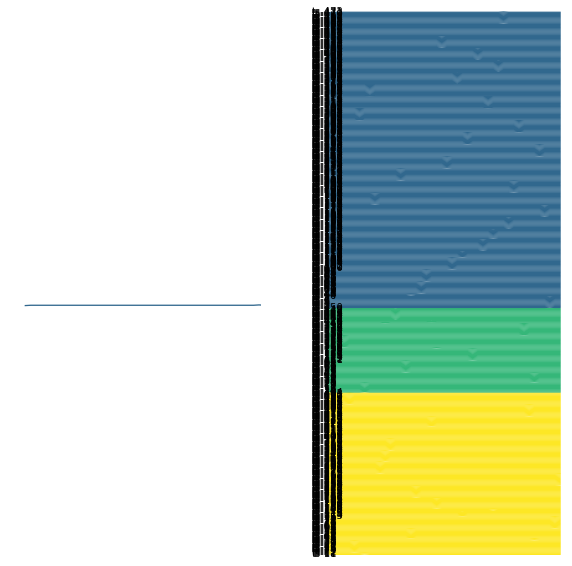

In [28]:
# Plotting the clusters
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=3)

In [29]:
class_data["Clusters"] = clusters

In [30]:
class_data=class_data.groupby("Country").agg({"Clusters":pd.Series.mode,
                                   "Incidence":"mean","cases":"mean","Population":pd.Series.mode}).reset_index()

In [31]:
for i in range(3):
    print(list(class_data[class_data["Clusters"]==i]["Country"]))

['Argentina', 'Austria', 'Bahrain', 'Croatia', 'Cyprus', 'Czech Republic (the)', 'Germany', 'Greece', 'Ireland', 'Italy', 'Sweden', 'United Kingdom of Great Britain and Northern Ireland (the)', 'United States of America (the)']
['Australia', 'Belgium', 'Denmark', 'France', 'Netherlands (the)', 'Spain', 'Switzerland']
['Algeria', 'Bangladesh', 'Brazil', 'Canada', 'Egypt', 'Hong Kong', 'India', 'Kazakhstan', 'Korea (the Republic of)', 'Lebanon', 'Malaysia', 'Malta', 'Morocco', 'Pakistan', 'Philippines (the)', 'Poland', 'Qatar', 'Romania', 'Russian Federation (the)', 'Saudi Arabia', 'Singapore', 'South Africa', 'Turkey', 'Ukraine', 'United Arab Emirates (the)']


###### Step14: Export the results into excel file for visualization

In [32]:
class_data.to_csv("clusters.csv",index=False)